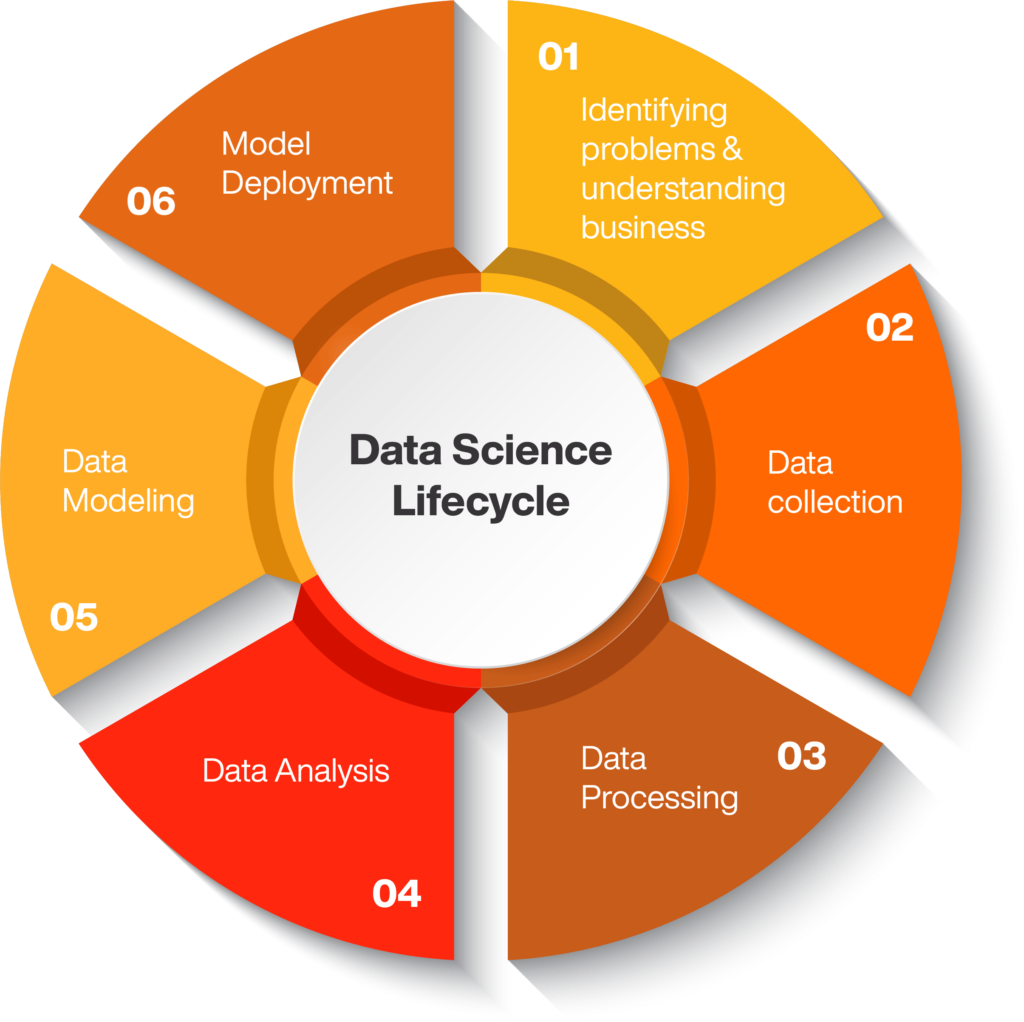

# Data Preparation (Data Wrangling) and Data Preprocessing

![Alt text](image-3.png)



Data scientists often complain that this is the most boring and time-consuming task involving the identification of various data quality issues.

In this step, we understand more about the data and prepare it for further analysis. 

The data understanding section of the data science methodology answers the question:

- Is the data that you collected representative of the problem to be solved?

This is one task that you will always end up doing. 

Cleaning data essentially means removing discrepancies from your data such as 
- missing fields, 
- improper values, 
- setting the right format of the data, 
- structuring data from raw files, etc.

Format the data into the desired structure, remove unwanted columns and features. Data preparation is the most time-consuming yet arguably the most important step in the entire life cycle.

Your model will be as good as your data. This is similar to washing veggies to remove the surface chemicals. 

## Data collection, data understanding, and data preparation take up to **70% — 90%** of the overall project time.

Some Steps 

- Scaling/Normalization
- Dealing with missing values (Nan, None, N/A,….)
- Applying different encoding strategies https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- Removing noisy data
- Removing outliers if any are present
- Performing feature selection
- Trying resampling strategies


In [1]:
import pandas as pd
import numpy as np
# from datetime import datetime

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', 100)


# pd.options.display.float_format = '{:,.2f}$'.format
# This format will display floating-point numbers
# in your pandas DataFrame with two decimal places,
# comma as a thousand separator, and a dollar sign
# at the end. For example,
#  123456.789 will be formatted as 123,456.79$
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
 
import warnings
warnings.simplefilter("ignore", UserWarning) 

## 1- Merging Files

In [4]:
Trade_df = pd.read_excel('Data_merge/Dates_TradeData_21-22.xlsx')
Finicial = pd.read_excel('Data_merge/CPI-GDP-2013-2023.xlsx')

merged_df = Finicial.merge(Trade_df ,
                           on=['Year','Month'],
                           how='inner'
                           )

print(merged_df.columns,'\n',merged_df.shape)

merged_df.to_excel(f'Data_merge/Dates_Data_all.xlsx')

Index(['Year', 'Month', 'CPI_ANNCHG', 'CPI_MTHCHG', 'Oil_price_high',
       'fertilizer_index', 'GDP', 'Unnamed: 0', 'Imports Weight (KG)',
       'Imports Value (AED)', 'Non-oil Exports Weight (KG)',
       'Non-oil Exports Value (AED)', 'Re-exports Weight (KG)',
       'Re-exports Value (AED)', 'Price/Kg(Exp)'],
      dtype='object') 
 (24, 15)


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         128 non-null    int64  
 1   Month                        128 non-null    int64  
 2   CPI_ANNCHG                   127 non-null    float64
 3   CPI_MTHCHG                   127 non-null    float64
 4   Oil_price_high               127 non-null    float64
 5   fertilizer_index             127 non-null    float64
 6   GDP                          127 non-null    float64
 7   Unnamed: 0                   25 non-null     float64
 8   Imports Weight (KG)          25 non-null     float64
 9   Imports Value (AED)          25 non-null     float64
 10  Non-oil Exports Weight (KG)  25 non-null     float64
 11  Non-oil Exports Value (AED)  25 non-null     float64
 12  Re-exports Weight (KG)       25 non-null     float64
 13  Re-exports Value (AE

## 2- Rename columns 

In [ ]:
file_name = 'DailyDelhiClimateTrain.csv'

data= pd.read_csv(file_name)


In [3]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
data.rename(columns={'wind_speed':'wind speed'},inplace=True)

In [9]:
data.head()

,date,meantemp,humidity,wind speed,meanpressure
0,2013-01-01,10.00$,84.50$,0.00$,"1,015.67$"
1,2013-01-02,7.40$,92.00$,2.98$,"1,017.80$"
2,2013-01-03,7.17$,87.00$,4.63$,"1,018.67$"
3,2013-01-04,8.67$,71.33$,1.23$,"1,017.17$"
4,2013-01-05,6.00$,86.83$,3.70$,"1,016.50$"


In [10]:
data.columns += '_Delhi' 

In [11]:
data.head()

,date_Delhi,meantemp_Delhi,humidity_Delhi,wind speed_Delhi,meanpressure_Delhi
0,2013-01-01,10.00$,84.50$,0.00$,"1,015.67$"
1,2013-01-02,7.40$,92.00$,2.98$,"1,017.80$"
2,2013-01-03,7.17$,87.00$,4.63$,"1,018.67$"
3,2013-01-04,8.67$,71.33$,1.23$,"1,017.17$"
4,2013-01-05,6.00$,86.83$,3.70$,"1,016.50$"


In [12]:
data.columns

Index(['date_col', 'meantemp_col', 'humidity_col', 'wind speed_col',
       'meanpressure_col'],
      dtype='object')

In [13]:
data.columns = [x.replace('_',' ') + '_Weather' for x in data.columns ] # Operation  for loop  condition 

In [15]:
data.columns

Index(['date col_Weather', 'meantemp col_Weather', 'humidity col_Weather',
       'wind speed col_Weather', 'meanpressure col_Weather'],
      dtype='object')

In [14]:
data.head()

,date col_Weather,meantemp col_Weather,humidity col_Weather,wind speed col_Weather,meanpressure col_Weather
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [16]:
data = data.add_suffix('_new')

In [18]:
data = data.add_prefix('col_')

In [19]:
data.head()

,col_date col_Weather_new,col_meantemp col_Weather_new,col_humidity col_Weather_new,col_wind speed col_Weather_new,col_meanpressure col_Weather_new
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


##  3- Define Function to get info ABOUT Dates


In [7]:
def Info_Dates(DataFrame,Col_name):
    
    print(DataFrame[Col_name].value_counts()[:5])
    print("---------------------------------------------")
    print(DataFrame[Col_name].describe(datetime_is_numeric=True))
    print("---------------------------------------------")
    print("Top Date",DataFrame[Col_name].describe(datetime_is_numeric=False).top,"With most freq",DataFrame[Col_name].describe(datetime_is_numeric=False).freq)
    print("---------------------------------------------")
    print("First Date",DataFrame[Col_name].describe(datetime_is_numeric=False)['first'])
    print("---------------------------------------------")
    print("Last Date",DataFrame[Col_name].describe(datetime_is_numeric=False)['last'])
    print("---------------------------------------------")


In [13]:
Climate_Date = pd.read_csv('DailyDelhiClimateTrain.csv')

In [10]:
Climate_Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
date            1462 non-null object
meantemp        1462 non-null float64
humidity        1462 non-null float64
wind_speed      1462 non-null float64
meanpressure    1462 non-null float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [11]:
Climate_Date.sample(2)

,date,meantemp,humidity,wind_speed,meanpressure
1117,2016-01-23,14.437500,75.875000,3.25000,1019.812500
1320,2016-08-13,30.321429,77.071429,3.22963,1001.071429


In [16]:
list(Climate_Date.select_dtypes(['datetime64[ns]']).columns)

[]

In [17]:
Dates=list(Climate_Date.select_dtypes(['datetime64[ns]']).columns)
Dates

[]

In [19]:
# Convert 'date_column' to datetime
Climate_Date['date'] = pd.to_datetime(Climate_Date['date'])
Climate_Date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [20]:
Dates=list(Climate_Date.select_dtypes(['datetime64[ns]']).columns)
Dates

['date']

In [28]:
for col_date in Dates:
    print(f"Column Name = >>>>>>>>>>>>>  {col_date}")
    Info_Dates(Climate_Date,col_date)

Column Name = >>>>>>>>>>>>>  date
2013-01-01    1
2015-09-10    1
2015-09-08    1
2015-09-07    1
2015-09-06    1
Name: date, dtype: int64
---------------------------------------------
count                   1462
mean     2015-01-01 12:00:00
min      2013-01-01 00:00:00
25%      2014-01-01 06:00:00
50%      2015-01-01 12:00:00
75%      2016-01-01 18:00:00
max      2017-01-01 00:00:00
Name: date, dtype: object
---------------------------------------------
Top Date 2013-01-01 00:00:00 With most freq 1
---------------------------------------------
First Date 2013-01-01 00:00:00
---------------------------------------------
Last Date 2017-01-01 00:00:00
---------------------------------------------


C:\Users\Legion\AppData\Local\Temp\ipykernel_8584\1557818071.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("Top Date",DataFrame[Col_name].describe(datetime_is_numeric=False).top,"With most freq",DataFrame[Col_name].describe(datetime_is_numeric=False).freq)
C:\Users\Legion\AppData\Local\Temp\ipykernel_8584\1557818071.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print("Top Date",DataFrame[Col_name].describe(datetime_is_numeric=False).top,"With most freq",DataFrame[Col_name].describe(datetime_is_numeric=False).freq)
C:\Users\Legion\AppData\Local\Temp\ipykernel_8584\155781

## 5- Duplicates

In [21]:
# Load dataset
df = pd.read_csv("data_titanic.csv")
df1 = df.copy()
df1.shape

(891, 12)

In [22]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.00$,4,2,347082,31.27$,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.00$,0,0,349212,7.90$,NaN,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.00$,0,0,PC 17476,26.29$,E24,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.79$,NaN,Q
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.00$,0,0,345770,9.50$,NaN,S


In [23]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [24]:
df1[df1.duplicated()].shape

(0, 12)

In [21]:
df1[df1.duplicated(subset=['PassengerId'])].shape

(0, 12)

مستحيل  اي عمود يوجد بداخله 

ID 

انه يكون في تكرار

In [22]:
df1[df1.duplicated(subset=['Sex','Age'])].shape

(744, 12)

In [30]:
df1[df1.duplicated(keep='last',subset=['Sex','Age'])].sort_values(by=['Sex','Age']).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [40]:
df1[df1.duplicated(keep=False,subset=['Sex','Age'])].shape

(856, 12)

In [41]:
df1[df1.duplicated(keep='first',subset=['Sex','Age'])].shape

(744, 12)

In [ ]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,13.4167,C
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,7.9250,S


In [43]:
df1.shape

(891, 12)

In [42]:
df1[df1.duplicated(keep='last',subset=['Sex','Age'])].shape

(744, 12)

In [47]:
df1.drop_duplicates(keep='last',subset=['Age','Sex'],inplace=True)
df1.shape

(147, 12)

In [49]:
df1[df1.duplicated(keep='last',subset=['Age','Sex'])].shape

(0, 12)

In [7]:
import pandas as pd

# Create a DataFrame with duplicate rows
data = {'NID': [1, 2, 3, 2, 4, 3],
        'Name': ['foo', 'bar', 'baz', 'bar', 'qux',  'baz'],
        'Salary': [0.1, 0.2, 0.3, 0.2, 0.4,  0.3]}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
df


Original DataFrame:


,NID,Name,Salary
0,1,foo,0.1
1,2,bar,0.2
2,3,baz,0.3
3,2,bar,0.2
4,4,qux,0.4
5,3,baz,0.3


In [5]:
df.sort_values('Name')

,NID,Name,Salary
1,2,bar,0.2
3,2,bar,0.2
2,3,baz,0.3
5,3,baz,0.3
0,1,foo,0.1
4,4,qux,0.4


In [6]:
df[df.duplicated(keep=False)]

,NID,Name,Salary
1,2,bar,0.2
2,3,baz,0.3
3,2,bar,0.2
5,3,baz,0.3


In [ ]:
df.sort_values('Name')

,NID,Name,Salary
1,2,bar,0.2
3,2,bar,0.2
2,3,baz,0.3
5,3,baz,0.3
0,1,foo,0.1
4,4,qux,0.4


In [ ]:
df.drop_duplicates(keep='first')

,col_A,col_B,col_C
0,1,foo,0.1
1,2,bar,0.2
2,3,baz,0.3
4,4,qux,0.4


In [8]:
df[df.duplicated(keep=False,subset=['NID'])]

,NID,Name,Salary
1,2,bar,0.2
2,3,baz,0.3
3,2,bar,0.2
5,3,baz,0.3
